In [92]:
import pandas as pd
import numpy as np
import math as ma

In [93]:
df = pd.read_csv("./data/rappelconso0.csv", sep=";")
df = df.rename({"﻿Référence Fiche": "Réference Fiche"}, axis=1)

In [94]:
df.columns.to_list()

['Réference Fiche',
 'N° de Version',
 'Nature juridique du rappel',
 'Catégorie de produit',
 'Sous-catégorie de produit',
 'Nom de la marque du produit',
 'Noms des modèles ou références',
 'Identification des produits',
 'Conditionnements',
 'Date début/Fin de commercialisation',
 'Température de conservation',
 'Marque de salubrité',
 'Informations complémentaires',
 'Zone géographique de vente',
 'Distributeurs',
 'Motif du rappel',
 'Risques encourus par le consommateur',
 'Préconisations sanitaires',
 'Description complémentaire du risque',
 'Conduites à tenir par le consommateur',
 'Numéro de contact',
 'Modalités de compensation',
 'Date de fin de la procédure de rappel',
 'Informations complémentaires publiques',
 'Liens vers les images',
 'Lien vers la liste des produits',
 'Lien vers la liste des distributeurs',
 'Lien vers affichette PDF',
 'Lien vers la fiche rappel',
 'RappelGuid',
 'Date de publication']

In [95]:
df["Catégorie de produit"].unique()

array(['Vêtements, Mode, EPI', 'Alimentation',
       'Automobiles et moyens de déplacement',
       'Bébés-Enfants (hors alimentaire)', 'Maison-Habitat', 'Autres',
       'Hygiène-Beauté', 'Appareils électriques, Outils',
       'Sports-loisirs', 'Equipements de communication', nan],
      dtype=object)

In [96]:
df[pd.isna(df["Nature juridique du rappel"])]["Catégorie de produit"].unique()

array(['Automobiles et moyens de déplacement', 'Maison-Habitat', nan],
      dtype=object)

In [97]:
df

,Réference Fiche,N° de Version,Nature juridique du rappel,Catégorie de produit,Sous-catégorie de produit,Nom de la marque du produit,Noms des modèles ou références,Identification des produits,Conditionnements,Date début/Fin de commercialisation,...,Modalités de compensation,Date de fin de la procédure de rappel,Informations complémentaires publiques,Liens vers les images,Lien vers la liste des produits,Lien vers la liste des distributeurs,Lien vers affichette PDF,Lien vers la fiche rappel,RappelGuid,Date de publication
0,2021-03-0001,1,Volontaire (sans arrêté préfectoral),"Vêtements, Mode, EPI",Bijouterie,LOU YETU,Bracelet RAFAELLA,Tous les lots,NaN,NaN,...,Remboursement,NaN,Le consommateur est invité à cesser immédiatem...,https://rappel.conso.gouv.fr/image/99952f76-9a...,NaN,NaN,https://rappel.conso.gouv.fr/affichettePDF/9/I...,https://rappel.conso.gouv.fr/fiche-rappel/9/In...,D8B0BE3C-007B-4B47-9E9D-B4C5878E60EA,2021-03-26
1,2021-03-0002,1,Volontaire (sans arrêté préfectoral),"Vêtements, Mode, EPI",Equipements de Protection Individuels,Careline Medisafe,Masques de protection KN95 (Référence : 65665),20200412,Boîte de 20 pièces,NaN,...,Remboursement,NaN,NaN,https://rappel.conso.gouv.fr/image/485617b7-ee...,NaN,NaN,https://rappel.conso.gouv.fr/affichettePDF/10/...,https://rappel.conso.gouv.fr/fiche-rappel/10/I...,9599A5D9-047A-4CBC-8776-4629DDB66952,2021-03-26
2,2021-03-0003,1,Volontaire (sans arrêté préfectoral),"Vêtements, Mode, EPI","Vêtements, textiles, accessoires de mode",Tajine Banane,sweat shirt Hoody Cantine gris Tajine Banane,Tous les lots,NaN,NaN,...,Echange,NaN,NaN,https://rappel.conso.gouv.fr/image/f0799218-f5...,NaN,NaN,https://rappel.conso.gouv.fr/affichettePDF/11/...,https://rappel.conso.gouv.fr/fiche-rappel/11/I...,DB9B00F9-C1E5-4085-939F-DB6ABACBF57F,2021-03-26
3,2021-03-0004,1,Volontaire (sans arrêté préfectoral),Alimentation,Céréales et produits de boulangerie,Système U,Bagels Sésame,L0237 Date limite de consommation 12/11/2020 ...,NaN,NaN,...,Remboursement,NaN,Les autorités sanitaires françaises ont été in...,https://rappel.conso.gouv.fr/image/937cc7be-cd...,NaN,NaN,https://rappel.conso.gouv.fr/affichettePDF/12/...,https://rappel.conso.gouv.fr/fiche-rappel/12/I...,F57D7BC2-1373-4000-B1C3-34028C8DBFAD,2021-03-26
4,2021-03-0005,1,Volontaire (sans arrêté préfectoral),Automobiles et moyens de déplacement,Tous types d'accessoires,Formula Baby,"Siège Auto Groupe 2/3 Formula Baby Select, mod...",Tous les lots,NaN,NaN,...,Remboursement,NaN,NaN,https://rappel.conso.gouv.fr/image/a2852c2f-9f...,NaN,NaN,https://rappel.conso.gouv.fr/affichettePDF/13/...,https://rappel.conso.gouv.fr/fiche-rappel/13/I...,5106DA04-3429-47F2-A83D-20AF2CFD8654,2021-03-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9605,A12/00590/23,0,NaN,Automobiles et moyens de déplacement,"Automobiles, motos, scooters",Volkswagen,Grand California 600 Grand California 680 Cam...,16.05.2019 - 20.06.2022,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://rappel.conso.gouv.fr/affichettePDF/518...,https://rappel.conso.gouv.fr/fiche-rappel/5183...,42fc91fc13863229fcb642297286d3c6721d8206,2023-03-24
9606,A12/01929/23,0,NaN,Automobiles et moyens de déplacement,"Automobiles, motos, scooters",Bmw,"1 Series, 3 Series, M coupé, M3, X1, X3, X5M. ...",2005 - 2014,NaN,NaN,...,NaN,NaN,NaN,https://rappel.conso.gouv.fr/image/86626bd7-be...,NaN,NaN,https://rappel.conso.gouv.fr/affichettePDF/518...,https://rappel.conso.gouv.fr/fiche-rappel/5184...,68cda30ff0c84bd5d5c6417a1c7a4afe2443e7fd,2023-09-01
9607,A12/01883/23,0,NaN,Automobiles et moyens de déplacement,"Automobiles, motos, scooters",Bmw,X5 - X6 Voiture de tourisme,2007 - 2008,NaN,NaN,...,NaN,NaN,NaN,https://rappel.conso.gouv.fr/image/31102c0c-05...,NaN,NaN,https://rappel.conso.gouv.fr/affichettePDF/518...,https://rappel.conso.gouv.fr/fiche-rappel/5185...,a9eb5a1e351627760ba814cf840e74f4682e188e,2023-08-25
9608,A12/01931/23,0,NaN,Automobiles et moyens de déplacement,"Automobiles, m

In [98]:
list_util = ["Réference Fiche", "Date de publication", "Nature juridique du rappel", "Catégorie de produit", "Sous-catégorie de produit", 
             "Nom de la marque du produit", "Zone géographique de vente", "Distributeurs", "Motif du rappel", 
             "Risques encourus par le consommateur", "Modalités de compensation", "Date de fin de la procédure de rappel"]
df_util = df.copy()
df_util = df_util[list_util]

In [99]:
df_util

,Réference Fiche,Date de publication,Nature juridique du rappel,Catégorie de produit,Sous-catégorie de produit,Nom de la marque du produit,Zone géographique de vente,Distributeurs,Motif du rappel,Risques encourus par le consommateur,Modalités de compensation,Date de fin de la procédure de rappel
0,2021-03-0001,2021-03-26,Volontaire (sans arrêté préfectoral),"Vêtements, Mode, EPI",Bijouterie,LOU YETU,France entière,LOU YETU\r\nAutres,Présence de plomb en quantité supérieure au se...,Intoxication,Remboursement,NaN
1,2021-03-0002,2021-03-26,Volontaire (sans arrêté préfectoral),"Vêtements, Mode, EPI",Equipements de Protection Individuels,Careline Medisafe,France entière,TOUS DISTRIBUTEURS,La filtration du masque n’est pas suffisante e...,Dommages internes Intoxication,Remboursement,NaN
2,2021-03-0003,2021-03-26,Volontaire (sans arrêté préfectoral),"Vêtements, Mode, EPI","Vêtements, textiles, accessoires de mode",Tajine Banane,France entière,TOUS DISTRIBUTEURS,Les embouts métalliques des cordons de la capu...,Dommages internes Intoxication,Echange,NaN
3,2021-03-0004,2021-03-26,Volontaire (sans arrêté préfectoral),Alimentation,Céréales et produits de boulangerie,Système U,France entière,Système U,"Présence d’un produit chimique, l’oxyde d’éthy...",Dépassement des limites autorisées de pesticides,Remboursement,NaN
4,2021-03-0005,2021-03-26,Volontaire (sans arrêté préfectoral),Automobiles et moyens de déplacement,Tous types d'accessoires,Formula Baby,France entière,TOUS DISTRIBUTEURS,La conception du siège peut entraîner un risqu...,Blessures externes,Remboursement,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9605,A12/00590/23,2023-03-24,NaN,Automobiles et moyens de déplacement,"Automobiles, motos, scooters",Volkswagen,NaN,NaN,"Lorsque vous conduisez à vitesse, le toit ouvr...",Blessures,NaN,NaN
9606,A12/01929/23,2023-09-01,NaN,Automobiles et moyens de déplacement,"Automobiles, motos, scooters",Bmw,NaN,NaN,Le propulsif dans l’airbag du conducteur peut ...,Blessures,NaN,NaN
9607,A12/01883/23,2023-08-25,NaN,Automobiles et moyens de déplacement,"Automobiles, motos, scooters",Bmw,NaN,NaN,Le propulsif dans l’airbag du conducteur peut ...,Blessures,NaN,NaN
9608,A12/01931/23,2023-09-01,NaN,Automobiles et moyens de déplacement,"Automobiles, motos, scooters",Bmw,NaN,NaN,Le propulsif dans l’airbag passager peut se dé...,Blessures,NaN,NaN


In [100]:
df_util[["Catégorie de produit", "Réference Fiche"]].groupby(by="Catégorie de produit").count()

,Réference Fiche
Catégorie de produit,
Alimentation,7254
"Appareils électriques, Outils",127
Automobiles et moyens de déplacement,1158
Autres,110
Bébés-Enfants (hors alimentaire),357
Equipements de communication,2
Hygiène-Beauté,148
Maison-Habitat,204
Sports-loisirs,58


# 1er PLOT

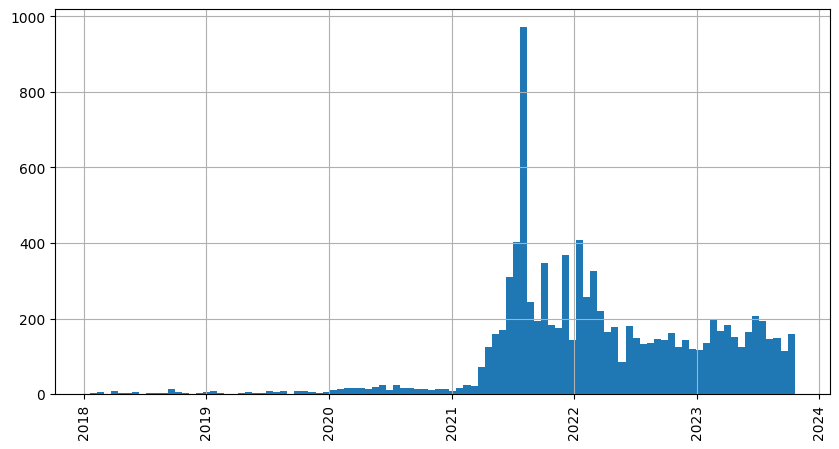

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot cumsum of recalls with hue = product category and time
plt.figure(figsize=(10, 5))
df_util["Date de publication"] = pd.to_datetime(df_util["Date de publication"])
df_util["Date de publication"].hist(bins=100)
plt.xticks(rotation=90)
plt.show()

In [102]:
def fillna(df, col, value):
    # fillna sur une colonne
    df[col] = df[col].fillna(value)
    return df

def fillnas(df, dictio):
    # plusieurs fillna en même temps
    for k, v in dictio.items():
        df = fillna(df, k, v)
    return df

def replace_value_in_col(df, col:str, dictio:dict):
    # remplace les valeurs d'une colonne par d'autres
    df[col] = df[col].replace(dictio)
    return df

def replace_values_in_cols(df, dictio:dict):
    # remplace les valeurs de plusieurs colonnes par d'autres
    for col, values in dictio.items():
        df = replace_value_in_col(df, col, values)
    return df


In [237]:
df = pd.read_csv("./data/rappelconso0.csv", sep=";")
df = df.rename({"﻿Référence Fiche": "Réference Fiche"}, axis=1)

In [238]:

# list columns which contain NaN values
df = fillnas(df, {"Nature juridique du rappel": "Volontaire (sans arrêté préfectoral)",
                  "Catégorie de produit": "Non Catégorié",
                  "Sous-catégorie de produit": "Non Catégorisé",
                 #'Zone géographique de vente':'France entière', 
                  'Distributeurs':'Non Spécifié',
                  'Modalités de compensation' : "Non Spécifié",
                  'Date de fin de la procédure de rappel' : "Non Spécifié"})


list_na_ok = ["Nom de la marque du produit", 'Noms des modèles ou références',
 'Identification des produits',
 'Conditionnements',
 'Date début/Fin de commercialisation',
 'Température de conservation',
 'Marque de salubrité',
 'Informations complémentaires','Zone géographique de vente',
 'Préconisations sanitaires',
 'Description complémentaire du risque',
 'Conduites à tenir par le consommateur',
 'Numéro de contact',
 'Informations complémentaires publiques',
 'Liens vers les images',
 'Lien vers la liste des produits',
 'Lien vers la liste des distributeurs'
 ]
[i for i in df.columns[pd.isna(df).any()].tolist() if i not in list_na_ok] 

[]

In [239]:
df["Distributeurs"] = df["Distributeurs"].apply(lambda x: x.lower() if type(x) == str else x)
df["Distributeurs"] = df["Distributeurs"].apply(lambda x: x.replace("\r\n", ",") if type(x) == str else x)

a = df['Distributeurs'].dropna().unique().tolist()
b = [i for i in a if len(i)> 10]
list_distrib = [i.lower() for i in ["AUCHAN", "CARREFOUR", "SYSTEME U", 
                "CASINO", "INTERMARCHE", "LEADER PRICE", 
                "LECLERC", "ATAC", "CANTREL SALAISON SARL",
                "CORA", "LKB INTERNATIONAL", "LIDL", "MONOPRIX", 
                "AMAZON", "CDISCOUNT", "FRANPRIX", "LEADER PRICE", "FNAC",
                "DARTY", "HYPERMARCHé", "MONOPRIX", " U ", "LA RUCHE QUI DIT OUI"]]
# not any but more than one
c = [i for i in b if sum([j in i.lower() for j in list_distrib]) > 1]
d = [i for i in b if sum([j in i.lower() for j in list_distrib]) == 1]
df.loc[df["Distributeurs"].isin([i for i in c]), "Distributeurs"] = "Plusieurs Grands Distributeurs"
# for each distributeur in df that is also in d, replace by the name of the distributeur in list_distrib
for i in d:
    for j in list_distrib:
        if j in i.lower():
            if j == " U ":
                df.loc[df["Distributeurs"] == i, "Distributeurs"] = "SYSTEME U"
            df.loc[df["Distributeurs"] == i, "Distributeurs"] = j
a = df['Distributeurs'].dropna().unique().tolist()
b = a
c = [i for i in b if sum([j in i.lower() for j in list_distrib]) > 1]
d = [i for i in b if sum([j in i.lower() for j in list_distrib]) == 1]
len(c)

2

In [247]:
[i for i in df["Distributeurs"] if "Carrefour" in i]

[]

In [240]:
(len(set([i for i in b if ((i not in c) and (i not in d))])), set([i for i in b if ((i not in c) and (i not in d))]))

(2347,
 {'point de ventes',
  'la boite à fromage (marché, amap)',
  'mangeons frais',
  'voir liste détaillée des points de vente',
  'voir liste points de vente en pièce jointe',
  'magasin ma vie en bio, 1 rue du bas noyer, 95610 eragny sur oise',
  'jardineries, drogueries, magasins de bricolages',
  'gms,commerce de gros,commerce sedentaire/non sedentaire',
  'aubert,autour de bébé,allo bébé,bb9,made in bébé,vertbaudet,orchestra ,made4baby,sarl fille ou garçon,baby city,boulevard des bébés',
  'akar nord france 7 rue laveran 57070 metz',
  "magasins c'est 2 euros",
  'certains magasins des enseignes o bon plan/lebonplan, maxxilot, abm destock, destock tout  abmdestock',
  'medic gov,grande pharmacie convention',
  'bofrost*',
  'magasins à enseigne botanic',
  'intermarché delle,37, faubourg de belfort 90100 delle',
  'réseau professionnel identifié et informé',
  'vente directe,marché de sainte croix vallée française,marché de saint jean du gard',
  'argel ouest et sud',
  'ago c

In [241]:
(len(set(d)), set(d))

(23,
 {' u ',
  'amazon',
  'amazon.',
  'atac',
  'auchan',
  'carrefour',
  'carrefour,',
  'casino',
  'cdiscount',
  'cora',
  'cora flers',
  'cora,match',
  'e. leclerc',
  'e.leclerc',
  'e.leclerc.',
  'franprix',
  'hypermarché',
  'intermarche',
  'la ruche qui dit oui',
  'leclerc',
  'lidl',
  'lidl snc',
  'systeme u'})

In [242]:
df[df["Distributeurs"] == "LOU YETU\r\nAutres"]

,Réference Fiche,N° de Version,Nature juridique du rappel,Catégorie de produit,Sous-catégorie de produit,Nom de la marque du produit,Noms des modèles ou références,Identification des produits,Conditionnements,Date début/Fin de commercialisation,...,Modalités de compensation,Date de fin de la procédure de rappel,Informations complémentaires publiques,Liens vers les images,Lien vers la liste des produits,Lien vers la liste des distributeurs,Lien vers affichette PDF,Lien vers la fiche rappel,RappelGuid,Date de publication
